In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import random # for random value
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # plotting 
from PIL import Image # Image processing
import json  #json file I/O
#from mpl_toolkits.basemap import Basemap
import matplotlib.patches as patches

In [3]:
from keras.models import Sequential
from keras.layers import Dense, Flatten, Activation
from keras.layers import Dropout
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.utils import np_utils
from keras.optimizers import SGD
import keras.callbacks

In [4]:
from pathlib import Path
from skimage.io import imread
from skimage.color import rgb2gray

In [5]:
from pathlib import Path
from skimage.io import imread
from skimage.color import rgb2gray
import tifffile as tiff
import time 

In [6]:
#set up too see all contents
#reference: https://stackoverflow.com/questions/60013721/how-to-see-complete-rows-in-google-colab
pd.set_option('max_rows', 99999)
pd.set_option('max_colwidth', 400)
pd.describe_option('max_colwidth')

display.max_colwidth : int or None
    The maximum width in characters of a column in the repr of
    a pandas data structure. When the column overflows, a "..."
    placeholder is embedded in the output. A 'None' value means unlimited.
    [default: 50] [currently: 400]


## Import and Process Data

In [7]:
!unzip "/content/drive/MyDrive/EuroSAT.zip" -d "/content/drive/MyDrive/EuroSAT_Img"

流式输出内容被截断，只能显示最后 5000 行内容。
  inflating: /content/drive/MyDrive/EuroSAT_Img/2750/SeaLake/SeaLake_2206.jpg  
  inflating: /content/drive/MyDrive/EuroSAT_Img/2750/SeaLake/SeaLake_1313.jpg  
  inflating: /content/drive/MyDrive/EuroSAT_Img/2750/SeaLake/SeaLake_263.jpg  
  inflating: /content/drive/MyDrive/EuroSAT_Img/2750/SeaLake/SeaLake_967.jpg  
  inflating: /content/drive/MyDrive/EuroSAT_Img/2750/SeaLake/SeaLake_515.jpg  
  inflating: /content/drive/MyDrive/EuroSAT_Img/2750/SeaLake/SeaLake_1465.jpg  
  inflating: /content/drive/MyDrive/EuroSAT_Img/2750/SeaLake/SeaLake_1817.jpg  
  inflating: /content/drive/MyDrive/EuroSAT_Img/2750/SeaLake/SeaLake_2902.jpg  
  inflating: /content/drive/MyDrive/EuroSAT_Img/2750/SeaLake/SeaLake_2570.jpg  
  inflating: /content/drive/MyDrive/EuroSAT_Img/2750/SeaLake/SeaLake_1004.jpg  
  inflating: /content/drive/MyDrive/EuroSAT_Img/2750/SeaLake/SeaLake_174.jpg  
  inflating: /content/drive/MyDrive/EuroSAT_Img/2750/SeaLake/SeaLake_2111.jpg  
  inflating: /con

In [7]:
#Data directory
ac = Path("/content/drive/MyDrive/EuroSAT_Img/2750/AnnualCrop")
df1 = pd.DataFrame({'path': list(ac.glob('**/*.jp*g'))})

fo = Path("/content/drive/MyDrive/EuroSAT_Img/2750/Forest")
df2 = pd.DataFrame({'path': list(fo.glob('**/*.jp*g'))})

hv = Path("/content/drive/MyDrive/EuroSAT_Img/2750/HerbaceousVegetation")
df3 = pd.DataFrame({'path': list(hv.glob('**/*.jp*g'))})

hw = Path("/content/drive/MyDrive/EuroSAT_Img/2750/Highway")
df4 = pd.DataFrame({'path': list(hw.glob('**/*.jp*g'))})

ind = Path("/content/drive/MyDrive/EuroSAT_Img/2750/Industrial")
df5 = pd.DataFrame({'path': list(ind.glob('**/*.jp*g'))})

pas = Path("/content/drive/MyDrive/EuroSAT_Img/2750/Pasture")
df6 = pd.DataFrame({'path': list(pas.glob('**/*.jp*g'))})

pc = Path("/content/drive/MyDrive/EuroSAT_Img/2750/PermanentCrop")
df7 = pd.DataFrame({'path': list(pc.glob('**/*.jp*g'))})

res = Path("/content/drive/MyDrive/EuroSAT_Img/2750/Residential")
df8 = pd.DataFrame({'path': list(res.glob('**/*.jp*g'))})

riv = Path("/content/drive/MyDrive/EuroSAT_Img/2750/River")
df9 = pd.DataFrame({'path': list(riv.glob('**/*.jp*g'))})

sl = Path("/content/drive/MyDrive/EuroSAT_Img/2750/SeaLake")
df10 = pd.DataFrame({'path': list(sl.glob('**/*.jp*g'))})

Classes:
  - builtup (1)
    - industrial
    - highway
    - residential
  - natural green (2)
    - forest
    - HerbaceousVegetation
    - Pasture
  - Others (0)


Classes:
  - builtup (1)
    - industrial
    - residential
  - green cover (2)
    - HerbaceousVegetation
    - Forest
  - Others (0)

Classes:
  - builtup (1)
    - residential
  - natural green (2)
    - Annual Crop
    - HerbaceousVegetation
  - Others (0)




In [8]:
#make labels and categories --> select out residential
df1["category"] = "AnnualCrop"
df1["label"] = 0

df2["category"] = "Forest"
df2["label"] = 0

df3["category"] = "HerbaceousVegetation"
df3["label"] = 0

df4["category"] = "Highway"
df4["label"] = 0

df5["category"] = "Industrial"
df5["label"] = 0

df6["category"] = "Pasture"
df6["label"] = 0

df7["category"] = "PermanentCrop"
df7["label"] = 0

df8["category"] = "Residential"
df8["label"] = 1

df9["category"] = "River"
df9["label"] = 0

df10["category"] = "SeaLake"
df10["label"] = 0

In [9]:
#combine the dataset
EuroSAT = pd.DataFrame().append([df1, df2, df3, df4, df5, df6, df7, df8, df9, df10])

In [10]:
len(EuroSAT)

27000

In [11]:
X_data = EuroSAT["path"]
y_data = EuroSAT["label"].values

In [12]:
#Split the data into training (50%) and testing sets (50%)
from sklearn.model_selection import train_test_split
X_train, X_test,y_train, y_test = train_test_split(X_data, y_data, train_size=0.5, random_state=42)

In [13]:
print(X_train.shape)
print(y_train.shape)

(13500,)
(13500,)


### Read Images (R, G, B)

In [14]:
# read images without vectorize them
num = X_train.shape[0]
dim_train = np.zeros([num, 64, 64, 3])

# loop
for i, tmpPath in enumerate(X_train.values):
    img_rgb_train = imread(tmpPath)
    dim_train[i, :, :, :] = img_rgb_train

In [15]:
dim_train.shape

(13500, 64, 64, 3)

In [16]:
#read images without vectorize them
num = X_train.shape[0]
dim_test = np.zeros([num, 64, 64, 3])

#loop
for i, tmpPath in enumerate(X_test.values):
    img_rgb_test = imread(tmpPath)
    dim_test[i, :, :, :] = img_rgb_test

In [129]:
dim_test.shape

(13500, 64, 64, 3)

In [17]:
#change labels to categorical
from keras.utils import to_categorical

y_train_labels = to_categorical(y_train)
y_test_labels = to_categorical(y_test)


In [18]:
y_train_labels

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       ...,
       [1., 0.],
       [1., 0.],
       [1., 0.]], dtype=float32)

## DL Model

In [ ]:
#edit model based on  VGG16

from keras.applications import VGG16
from keras import models
from keras import layers

In [ ]:
model_vgg = VGG16(input_shape=(64, 64,3), weights='imagenet',include_top=False)

58892288/58889256 [==============================] - 0s 0us/step


In [ ]:
print(model_vgg.summary())

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 64, 64, 3)]       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 64, 64, 64)        1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 64, 64, 64)        36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 32, 32, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 32, 32, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 32, 32, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 16, 16, 128)       0     

edit model

<br>
reference:https://github.com/keras-team/keras/issues/4465

In [ ]:
from keras.applications.vgg16 import VGG16
from keras.preprocessing import image
from keras.applications.vgg16 import preprocess_input
from keras.layers import Input, Flatten, Dense
from keras.models import Model
from keras.optimizers import Adam

In [ ]:
#change input format
input_layer = Input(shape=(64, 64, 3), name = 'image_input')

In [ ]:
#Use the generated model 
output_vgg16= model_vgg(input_layer)

In [ ]:
# Create the dropout layers
dropout1 = Dropout(0.85)
dropout2 = Dropout(0.85)

#Add the fully-connected layers 
x = Flatten(name='flatten_2')(model_vgg.output)
x = Dense(2048, activation='relu', name='dense_6')(x)
x = dropout1(x)
x = Dense(1028, activation='relu', name='dense_7')(x)
x = dropout2(x)
x = Dense(3, activation='softmax', name='dense_8')(x)

In [ ]:
#edited model
model = Model(inputs=model_vgg.input, outputs=x)

In [ ]:
print(model.summary())

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 64, 64, 3)]       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 64, 64, 64)        1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 64, 64, 64)        36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 32, 32, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 32, 32, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 32, 32, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 16, 16, 128)       0     

In [ ]:
model.compile(
    loss='categorical_crossentropy',
    optimizer=Adam(lr=1e-2),
    metrics=['accuracy'])

In [ ]:
# training
model.fit(dim_train, y_train_labels,
          batch_size=128,
          epochs=12,
          verbose=1,
          validation_data=(dim_test, y_test_labels))

Epoch 1/12
106/106 [==============================] - 26s 194ms/step - loss: 9204706859.4271 - accuracy: 0.5119 - val_loss: 0.8358 - val_accuracy: 0.6822
Epoch 2/12
106/106 [==============================] - 17s 165ms/step - loss: 0.8465 - accuracy: 0.6851 - val_loss: 0.8333 - val_accuracy: 0.6822
Epoch 3/12
106/106 [==============================] - 17s 163ms/step - loss: 0.8292 - accuracy: 0.6889 - val_loss: 0.8325 - val_accuracy: 0.6822
Epoch 4/12
106/106 [==============================] - 17s 162ms/step - loss: 0.8265 - accuracy: 0.6882 - val_loss: 0.8315 - val_accuracy: 0.6822
Epoch 5/12
106/106 [==============================] - 17s 162ms/step - loss: 0.8191 - accuracy: 0.6941 - val_loss: 0.8319 - val_accuracy: 0.6822
Epoch 6/12
106/106 [==============================] - 17s 163ms/step - loss: 0.8202 - accuracy: 0.6915 - val_loss: 0.8315 - val_accuracy: 0.6822
Epoch 7/12
106/106 [==============================] - 17s 164ms/step - loss: 0.8077 - accuracy: 0.6997 - val_loss: 0.8318

## Transfer Learning Attempts

In [41]:
import tensorflow as tf
from keras.models import Model
from keras.layers import Dense, Dropout, Flatten
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
from keras.optimizers import Adam


from keras.applications import VGG16, VGG19
from keras.applications import ResNet50, ResNet50V2, ResNet152V2
from keras.applications import InceptionV3, Xception

from sklearn.metrics import precision_recall_fscore_support, confusion_matrix, fbeta_score, accuracy_score

INPUT_SHAPE = (64, 64, 3)
NUM_CLASSES = 3

# Note that for different CNN models we are using different setup of dense layers
def compile_model(cnn_base, input_shape, n_classes, optimizer, fine_tune=None):
    
    if (cnn_base == 'ResNet50') or (cnn_base == 'ResNet50V2') or (cnn_base == 'ResNet152V2'):
        if cnn_base == 'ResNet50':
            conv_base = ResNet50(include_top=False,
                                 weights='imagenet', 
                                 input_shape=input_shape)
        elif cnn_base == 'ResNet50V2':
            conv_base = ResNet50V2(include_top=False,
                                 weights='imagenet', 
                                 input_shape=input_shape)
        else:
            conv_base = ResNet152V2(include_top=False,
                                 weights='imagenet', 
                                 input_shape=input_shape)
        top_model = conv_base.output
        top_model = Flatten()(top_model)
        top_model = Dense(2048, activation='relu')(top_model)
        top_model = Dropout(0.2)(top_model)
       
    
    elif (cnn_base == 'VGG16') or (cnn_base == 'VGG19'):
        if cnn_base == 'VGG16':
            conv_base = VGG16(include_top=False,
                              weights='imagenet', 
                              input_shape=input_shape)
        else:
            conv_base = VGG19(include_top=False,
                              weights='imagenet', 
                              input_shape=input_shape)
        top_model = conv_base.output
        top_model = Flatten()(top_model)
        top_model = Dense(2048, activation='relu')(top_model)
        top_model = Dropout(0.2)(top_model)
        top_model = Dense(2048, activation='relu')(top_model)
        top_model = Dropout(0.2)(top_model)
    
    
    output_layer = Dense(n_classes, activation='softmax')(top_model)
    
    model = Model(inputs=conv_base.input, outputs=output_layer)
        
    if type(fine_tune) == int:
        for layer in conv_base.layers[fine_tune:]:
            layer.trainable = True
    else:
        for layer in conv_base.layers:
            layer.trainable = False

    model.compile(optimizer=optimizer, loss='categorical_crossentropy',
                 metrics=['categorical_accuracy'])
    
    return model

In [42]:
vgg16_model = compile_model('VGG16', INPUT_SHAPE, NUM_CLASSES, Adam(lr=1e-2), fine_tune=None)
vgg16_model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 64, 64, 3)]       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 64, 64, 64)        1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 64, 64, 64)        36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 32, 32, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 32, 32, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 32, 32, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 16, 16, 128)       0     

In [132]:
vgg16_model.fit(dim_train, y_train_labels,
          batch_size=128,
          epochs=12,
          verbose=1,
          validation_data=(dim_test, y_test_labels))

Epoch 1/12
106/106 [==============================] - 9s 84ms/step - loss: 1.1921 - categorical_accuracy: 0.7312 - val_loss: 0.4876 - val_categorical_accuracy: 0.7966
Epoch 2/12
106/106 [==============================] - 9s 81ms/step - loss: 0.6188 - categorical_accuracy: 0.7767 - val_loss: 0.4495 - val_categorical_accuracy: 0.8062
Epoch 3/12
106/106 [==============================] - 9s 82ms/step - loss: 0.5240 - categorical_accuracy: 0.7934 - val_loss: 0.5741 - val_categorical_accuracy: 0.8081
Epoch 4/12
106/106 [==============================] - 9s 83ms/step - loss: 0.9839 - categorical_accuracy: 0.7867 - val_loss: 1.2141 - val_categorical_accuracy: 0.8153
Epoch 5/12
106/106 [==============================] - 9s 83ms/step - loss: 0.7540 - categorical_accuracy: 0.7915 - val_loss: 0.4901 - val_categorical_accuracy: 0.8220
Epoch 6/12
106/106 [==============================] - 9s 84ms/step - loss: 0.4729 - categorical_accuracy: 0.8110 - val_loss: 0.4851 - val_categorical_accuracy: 0.839

## Image Classification

In [7]:
!pip install rasterio

In [8]:
import rasterio
import numpy as np
import tifffile as tiff
import matplotlib
import matplotlib.pyplot as plt

In [9]:
# Path
BDIR = '/content/drive/MyDrive/'
IMGDIR = BDIR + '/Image'
IMGID1 = 'dunhuang_20160801_20160831_10m'
IMGID2 = 'dunhuang_20200801_20200831_10m'
BANDS = ['B4', 'B3', 'B2'] #  R G B

In [10]:
def imageRead(IMGID):
  with rasterio.open(IMGDIR + '/' + IMGID + '_' + BANDS[0] + '.tif') as f:
    print('Reading band: 1 ' + BANDS[0])
    tmpImg = f.read(1)
  imgMat = np.zeros([tmpImg.shape[0], tmpImg.shape[1], len(BANDS)])
  imgMat[:,:,0] = tmpImg

  for i, tmpB in enumerate(BANDS[1:]):
    print('Reading band: ' + str(i+2) + ' ' + tmpB)
    with rasterio.open(IMGDIR + '/' + IMGID + '_' + tmpB + '.tif') as f:
      imgMat[:,:,i+1] = f.read(1)
  imgMat = imgMat.astype(np.float32)
  return imgMat

In [11]:
dunhuang_16 = imageRead(IMGID1)
dunhuang_20 = imageRead(IMGID2)

Reading band: 1 B4
Reading band: 2 B3
Reading band: 3 B2
Reading band: 1 B4
Reading band: 2 B3
Reading band: 3 B2


In [12]:
def scaleImgPerc(imgIn):
    w, h, d = imgIn.shape
    imgIn = np.reshape(imgIn, [w * h, d]).astype(np.float32)
    # Get 1st and 99th percentile
    mins = np.percentile(imgIn, 1, axis=0)
    maxs = np.percentile(imgIn, 99, axis=0) - mins
    imgIn = (imgIn - mins[None, :]) / maxs[None, :]
    imgIn = np.reshape(imgIn, [w, h, d])
    imgIn = (imgIn.clip(0, 1) * 255).astype(np.uint8)
    return imgIn

In [13]:
dunhuang_16_scale = np.nan_to_num(dunhuang_16)
dunhuang_16_scale = scaleImgPerc(dunhuang_16_scale)
dunhuang_20_scale = np.nan_to_num(dunhuang_20)
dunhuang_20_scale = scaleImgPerc(dunhuang_20_scale)

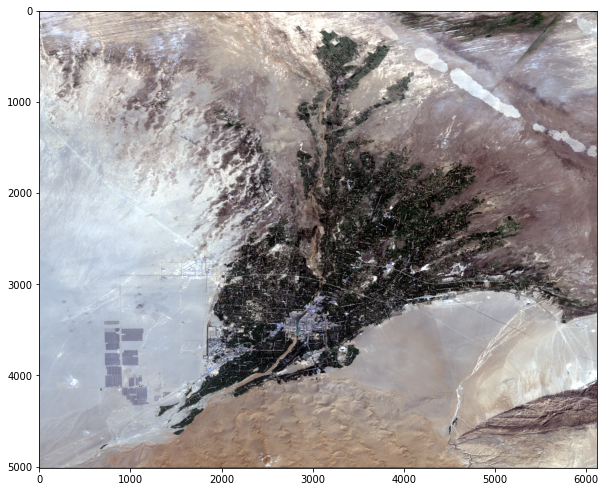

In [14]:
plt.figure(figsize=(10, 10))
plt.imshow(dunhuang_16_scale)
plt.axis()
plt.show()

In [15]:
n_spectrum = 3
width = dunhuang_16_scale.shape[1] # 6124 px
height = dunhuang_16_scale.shape[0] # 5014 px
print(width, height)

6124 5014


In [16]:
picture_vector = []
for chanel in range(n_spectrum):
    for y in range(height):
        for x in range(width):
            picture_vector.append(dunhuang_16_scale[y, x][chanel])

In [17]:
picture_vector = np.array(picture_vector).astype('uint8')
picture_vector

array([0, 0, 0, ..., 0, 0, 0], dtype=uint8)

In [18]:
picture_tensor = picture_vector.reshape([n_spectrum, height, width]).transpose(1, 2, 0)
picture_tensor

array([[[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]],

       [[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]],

       [[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]],

       ...,

       [[165, 164, 169],
        [165, 164, 169],
        [170, 164, 169],
        ...,
        [193, 192, 188],
        [193, 192, 188],
        [207, 210, 201]],

       [[163, 161, 170],
        [163, 161, 170],
        [165, 162, 169],
        ...,
        [194, 187, 190],
        [194, 187, 190],
        [209, 214, 210]],

       [[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]]

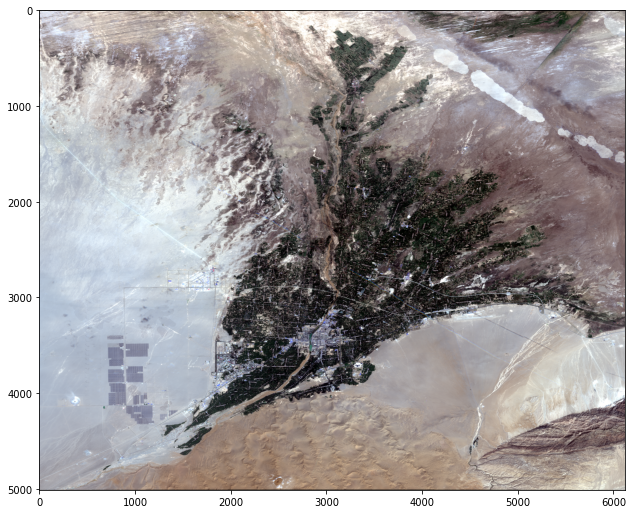

In [19]:
plt.figure(1, figsize = (15, 30))

plt.subplot(3, 1, 1)
plt.imshow(picture_tensor)

plt.show()

In [20]:
picture_tensor.shape

(5014, 6124, 3)

In [21]:
picture_tensor = picture_tensor.transpose(2,0,1)

In [22]:
picture_tensor.shape

(3, 5014, 6124)

In [23]:
import os
import sys
import tensorflow as tf
from tensorflow import keras

In [24]:
## Cutting Image

def cutting(x, y):
    area_study = np.arange(3*64*64).reshape(3, 64, 64)
    for i in range(64):
        for j in range(64):
            area_study[0][i][j] = picture_tensor[0][y+i][x+j]
            area_study[1][i][j] = picture_tensor[1][y+i][x+j]
            area_study[2][i][j] = picture_tensor[2][y+i][x+j]
    area_study = area_study.reshape([-1, 3, 64, 64])
    area_study = area_study.transpose([0,2,3,1])
    # area_study = area_study / 255
    sys.stdout.write('\rX:{0} Y:{1}  '.format(x, y))
    return area_study

In [25]:
cut_area_2016 = []
# Cutting image
step = 64; coordinates = []
for y in range(int((height-(64-step))/step)):
    for x in range(int((width-(64-step))/step)):
        cut_area_2016.append([cutting(x*step, y*step), [x*step, y*step]])

X:6016 Y:4928  

In [26]:
type(cut_area_2016)

list

In [27]:
cut_area_2016[565][0]

array([[[[175, 172, 172],
         [175, 172, 172],
         [175, 170, 168],
         ...,
         [181, 173, 174],
         [176, 169, 167],
         [162, 154, 152]],

        [[176, 173, 169],
         [176, 173, 169],
         [165, 155, 164],
         ...,
         [173, 166, 165],
         [170, 161, 158],
         [161, 153, 155]],

        [[167, 160, 158],
         [167, 160, 158],
         [160, 156, 158],
         ...,
         [174, 166, 166],
         [172, 165, 161],
         [170, 160, 160]],

        ...,

        [[159, 155, 156],
         [156, 149, 154],
         [156, 149, 154],
         ...,
         [161, 151, 152],
         [153, 145, 143],
         [148, 140, 143]],

        [[158, 154, 156],
         [158, 150, 153],
         [146, 136, 139],
         ...,
         [159, 151, 151],
         [156, 149, 151],
         [148, 139, 141]],

        [[158, 156, 156],
         [161, 156, 164],
         [165, 157, 164],
         ...,
         [155, 146, 149],
        

In [133]:
## Make Predictions
import time
print('[INFO] Predict Land Cover Type ...')
start = time.time()

coord_PermVeg = []
coord_BuiltUp = []
result_prob_16_vgg = np.zeros([len(cut_area_2016), 3])
result_class_16_vgg = np.zeros([len(cut_area_2016), 1])

for i in range(int(len(cut_area_2016))):
  result_prob_16_vgg[i] = vgg16_model.predict((cut_area_2016[i][0]))
  if result_prob_16_vgg[i][1] > 0.90:
    result_class_16_vgg[i][0] = 1
  elif result_prob_16_vgg[i][2] > 0.90:
    result_class_16_vgg[i][0] = 2
  else:
    result_class_16_vgg[i][0] = 0
end = time.time()
print('[INFO] Predict Land Cover Type took {}.'.format(end-start)) 

[INFO] Predict Land Cover Type ...
[INFO] Predict Land Cover Type took 273.58987617492676.


In [134]:
np.sum(result_class_16_vgg==2) #Green Cover

1497

In [135]:
np.sum(result_class_16_vgg==1) #Builtup

0

In [ ]:
def show_result(x, y, thickness=5):   
    for i in range(64):
        for ch in range(3):
            for th in range(thickness):
                picture_tensor[ch][y+i][x-th] = -1

    for i in range(64):
        for ch in range(3):
            for th in range(thickness):
                picture_tensor[ch][y+i][x+th+64] = -1
        
    for i in range(64):
        for ch in range(3):
            for th in range(thickness):
                picture_tensor[ch][y-th][x+i] = -1
        
    for i in range(64):
        for ch in range(3):
            for th in range(thickness):
                picture_tensor[ch][y+th+64][x+i] = -1

In [136]:
coord_PermVeg = []
coord_BuiltUp = []
i = 0;
for e in result_class_16_vgg:
  if e[0] == 1:
    coord_BuiltUp.append(cut_area_2016[i][1])
  elif e[0] == 2:
    coord_PermVeg.append(cut_area_2016[i][1])
  i += 1;

In [137]:
print(len(coord_PermVeg))
print(len(coord_BuiltUp))

1497
0


In [ ]:
for e in coord_BuiltUp:
    show_result(e[0], e[1])

In [50]:
#picture_tensor = picture_tensor.transpose(2,0,1)
picture_tensor = picture_tensor.transpose(1,2,0)
picture_tensor.shape

(5014, 6124, 3)

In [48]:
from matplotlib.patches import Rectangle
import matplotlib.patches as patches
import matplotlib.patches as mpatches

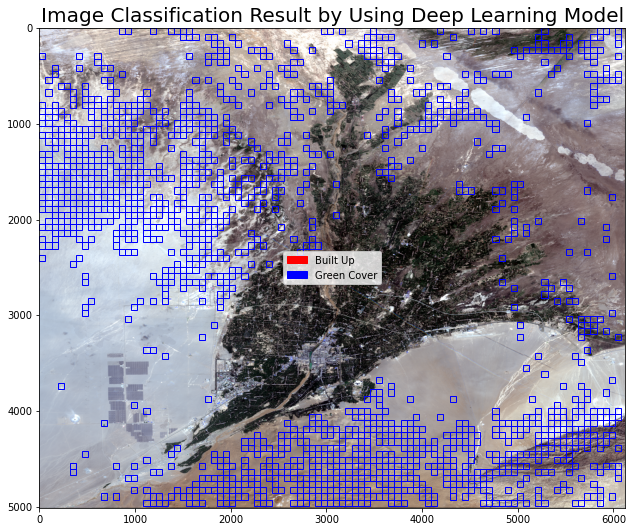

In [138]:
plt.figure(1, figsize = (15, 30))

plt.subplot(3,1,1)
plt.imshow(picture_tensor)

currentAxis = plt.gca()
for i in coord_BuiltUp:
  currentAxis.add_patch(Rectangle((i[0], i[1]), 64, 64, fill=None, alpha=1, color="red"))

for i in coord_PermVeg:
  currentAxis.add_patch(Rectangle((i[0], i[1]), 64, 64, fill=None, alpha=1, color="blue"))

#add legend:https://stackoverflow.com/questions/39500265/manually-add-legend-items-python-matplotlib
red_patch = mpatches.Patch(color='red', label='Built Up')
blue_patch = mpatches.Patch(color='blue', label='Green Cover')

plt.legend(handles=[red_patch, blue_patch])

plt.title("Image Classification Result by Using Deep Learning Model", fontsize=20)
plt.show()



In [ ]:
for i in coord_BuiltUp:
  print(i[0], i[1])

6016 768
3648 1088
0 1152
3392 1280
4416 1472
3456 3072
5824 3264
6016 3264
5696 3456
1728 3712
3392 3712


### Try 2 classes

Residential
Other

In [19]:
import tensorflow as tf
from keras.models import Model
from keras.layers import Dense, Dropout, Flatten
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
from keras.optimizers import Adam


from keras.applications import VGG16, VGG19
from keras.applications import ResNet50, ResNet50V2, ResNet152V2
from keras.applications import InceptionV3, Xception

from sklearn.metrics import precision_recall_fscore_support, confusion_matrix, fbeta_score, accuracy_score

INPUT_SHAPE = (64, 64, 3)
NUM_CLASSES = 2

# Note that for different CNN models we are using different setup of dense layers
def compile_model(cnn_base, input_shape, n_classes, optimizer, fine_tune=None):
    
    if (cnn_base == 'ResNet50') or (cnn_base == 'ResNet50V2') or (cnn_base == 'ResNet152V2'):
        if cnn_base == 'ResNet50':
            conv_base = ResNet50(include_top=False,
                                 weights='imagenet', 
                                 input_shape=input_shape)
        elif cnn_base == 'ResNet50V2':
            conv_base = ResNet50V2(include_top=False,
                                 weights='imagenet', 
                                 input_shape=input_shape)
        else:
            conv_base = ResNet152V2(include_top=False,
                                 weights='imagenet', 
                                 input_shape=input_shape)
        top_model = conv_base.output
        top_model = Flatten()(top_model)
        top_model = Dense(2048, activation='relu')(top_model)
        top_model = Dropout(0.2)(top_model)
       
    
    elif (cnn_base == 'VGG16') or (cnn_base == 'VGG19'):
        if cnn_base == 'VGG16':
            conv_base = VGG16(include_top=False,
                              weights='imagenet', 
                              input_shape=input_shape)
        else:
            conv_base = VGG19(include_top=False,
                              weights='imagenet', 
                              input_shape=input_shape)
        top_model = conv_base.output
        top_model = Flatten()(top_model)
        top_model = Dense(2048, activation='relu')(top_model)
        top_model = Dropout(0.2)(top_model)
        top_model = Dense(2048, activation='relu')(top_model)
        top_model = Dropout(0.2)(top_model)
    
    
    output_layer = Dense(n_classes, activation='softmax')(top_model)
    
    model = Model(inputs=conv_base.input, outputs=output_layer)
        
    if type(fine_tune) == int:
        for layer in conv_base.layers[fine_tune:]:
            layer.trainable = True
    else:
        for layer in conv_base.layers:
            layer.trainable = False

    model.compile(optimizer=optimizer, loss='categorical_crossentropy',
                 metrics=['categorical_accuracy'])
    
    return model

In [20]:
vgg16_model2 = compile_model('VGG16', INPUT_SHAPE, NUM_CLASSES, Adam(lr=1e-2), fine_tune=None)
vgg16_model2.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 64, 64, 3)]       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 64, 64, 64)        1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 64, 64, 64)        36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 32, 32, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 32, 32, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 32, 32, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 16, 16, 128)       0     

In [21]:
vgg16_model2.fit(dim_train, y_train_labels,
          batch_size=128,
          epochs=12,
          verbose=1,
          validation_data=(dim_test, y_test_labels))

Epoch 1/12
106/106 [==============================] - 45s 97ms/step - loss: 100.1783 - categorical_accuracy: 0.8566 - val_loss: 0.0715 - val_categorical_accuracy: 0.9781
Epoch 2/12
106/106 [==============================] - 8s 79ms/step - loss: 0.0724 - categorical_accuracy: 0.9728 - val_loss: 0.0563 - val_categorical_accuracy: 0.9830
Epoch 3/12
106/106 [==============================] - 8s 80ms/step - loss: 0.0473 - categorical_accuracy: 0.9820 - val_loss: 0.0684 - val_categorical_accuracy: 0.9830
Epoch 4/12
106/106 [==============================] - 8s 80ms/step - loss: 0.0424 - categorical_accuracy: 0.9836 - val_loss: 0.0526 - val_categorical_accuracy: 0.9852
Epoch 5/12
106/106 [==============================] - 9s 81ms/step - loss: 0.0326 - categorical_accuracy: 0.9887 - val_loss: 0.0583 - val_categorical_accuracy: 0.9833
Epoch 6/12
106/106 [==============================] - 9s 81ms/step - loss: 0.0360 - categorical_accuracy: 0.9863 - val_loss: 0.0604 - val_categorical_accuracy: 0.

In [42]:
cut_area_2016_2 = []
# Cutting image
step = 64; coordinates = []
for y in range(int((height-(64-step))/step)):
    for x in range(int((width-(64-step))/step)):
        cut_area_2016_2.append([cutting(x*step, y*step), [x*step, y*step]])

X:6016 Y:4928  

In [43]:
cut_area_2016_2[1][0]

array([[[[  0,   0,   0],
         [  0,   0,   0],
         [  0,   0,   0],
         ...,
         [  0,   0,   0],
         [  0,   0,   0],
         [  0,   0,   0]],

        [[  0,   0,   0],
         [  0,   0,   0],
         [  0,   0,   0],
         ...,
         [  0,   0,   0],
         [  0,   0,   0],
         [  0,   0,   0]],

        [[  0,   0,   0],
         [  0,   0,   0],
         [  0,   0,   0],
         ...,
         [  0,   0,   0],
         [  0,   0,   0],
         [  0,   0,   0]],

        ...,

        [[213, 213, 230],
         [213, 213, 230],
         [221, 229, 243],
         ...,
         [191, 193, 206],
         [168, 158, 162],
         [173, 168, 170]],

        [[187, 187, 195],
         [187, 187, 195],
         [212, 207, 227],
         ...,
         [180, 173, 184],
         [173, 159, 168],
         [186, 177, 183]],

        [[208, 201, 216],
         [208, 201, 216],
         [219, 229, 239],
         ...,
         [191, 194, 206],
        

In [ ]:
vgg16_model2.predict((cut_area_2016_2[1][0]))

array([[1., 0.]], dtype=float32)

In [45]:
## Make Predictions
import time
print('[INFO] Predict Land Cover Type ...')
start = time.time()


result_prob_16_vgg2 = np.zeros([len(cut_area_2016_2), 2])
result_class_16_vgg2 = np.zeros([len(cut_area_2016_2), 1])

for i in range(int(len(cut_area_2016_2))):
  result_prob_16_vgg2[i] = vgg16_model2.predict((cut_area_2016_2[i][0]))
  if result_prob_16_vgg2[i][1] > 0.90:
    result_class_16_vgg2[i][0] = 1
  else:
    result_class_16_vgg2[i][0] = 0

end = time.time()
print('[INFO] Predict Land Cover Type took {}.'.format(end-start)) 

[INFO] Predict Land Cover Type ...
[INFO] Predict Land Cover Type took 270.2059006690979.


In [46]:
np.sum(result_class_16_vgg2==1) #Builtup

12

In [47]:

coord_BuiltUp2 = []
i = 0;
for e in result_class_16_vgg2:
  if e[0] == 1:
    coord_BuiltUp2.append(cut_area_2016_2[i][1])
  i += 1;

In [49]:
#picture_tensor = picture_tensor.transpose(2,0,1)
picture_tensor = picture_tensor.transpose(1,2,0)
picture_tensor.shape

(5014, 6124, 3)

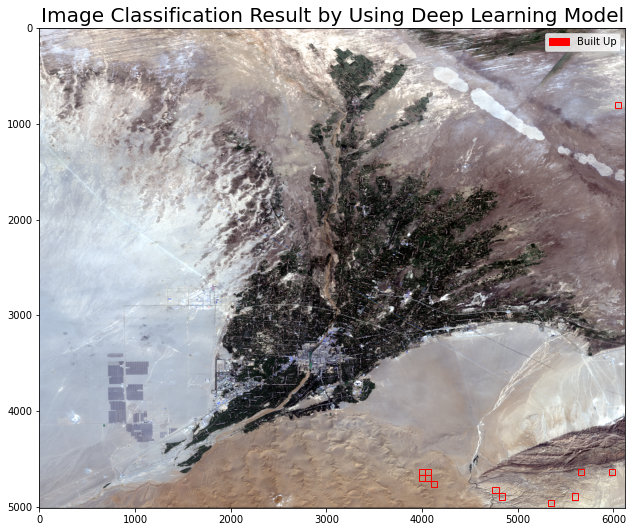

In [52]:
plt.figure(1, figsize = (15, 30))

plt.subplot(3,1,1)
plt.imshow(picture_tensor)

currentAxis = plt.gca()
for i in coord_BuiltUp2:
  currentAxis.add_patch(Rectangle((i[0], i[1]), 64, 64, fill=None, alpha=1, color="red"))

#add legend:https://stackoverflow.com/questions/39500265/manually-add-legend-items-python-matplotlib
red_patch = mpatches.Patch(color='red', label='Built Up')

plt.legend(handles=[red_patch])

plt.title("Image Classification Result by Using Deep Learning Model", fontsize=20)
plt.show()

  

plt.show()

## Limit Dataset and Make Prediction

In [28]:
#Data directory
ac = Path("/content/drive/MyDrive/EuroSAT_Img/2750/AnnualCrop")
df1 = pd.DataFrame({'path': list(ac.glob('**/*.jp*g'))})

fo = Path("/content/drive/MyDrive/EuroSAT_Img/2750/Forest")
df2 = pd.DataFrame({'path': list(fo.glob('**/*.jp*g'))})

hv = Path("/content/drive/MyDrive/EuroSAT_Img/2750/HerbaceousVegetation")
df3 = pd.DataFrame({'path': list(hv.glob('**/*.jp*g'))})

hw = Path("/content/drive/MyDrive/EuroSAT_Img/2750/Highway")
df4 = pd.DataFrame({'path': list(hw.glob('**/*.jp*g'))})

ind = Path("/content/drive/MyDrive/EuroSAT_Img/2750/Industrial")
df5 = pd.DataFrame({'path': list(ind.glob('**/*.jp*g'))})

pas = Path("/content/drive/MyDrive/EuroSAT_Img/2750/Pasture")
df6 = pd.DataFrame({'path': list(pas.glob('**/*.jp*g'))})

#pc = Path("/content/drive/MyDrive/EuroSAT_Img/2750/PermanentCrop")
#df7 = pd.DataFrame({'path': list(pc.glob('**/*.jp*g'))})

#res = Path("/content/drive/MyDrive/EuroSAT_Img/2750/Residential")
#df8 = pd.DataFrame({'path': list(res.glob('**/*.jp*g'))})

riv = Path("/content/drive/MyDrive/EuroSAT_Img/2750/River")
df9 = pd.DataFrame({'path': list(riv.glob('**/*.jp*g'))})

sl = Path("/content/drive/MyDrive/EuroSAT_Img/2750/SeaLake")
df10 = pd.DataFrame({'path': list(sl.glob('**/*.jp*g'))})

In [29]:
#make labels and categories --> select out residential
df1["category"] = "AnnualCrop"
df1["label"] = 2

df2["category"] = "Forest"
df2["label"] = 2

df3["category"] = "HerbaceousVegetation"
df3["label"] = 0

df4["category"] = "Highway"
df4["label"] = 0

df5["category"] = "Industrial"
df5["label"] = 1

df6["category"] = "Pasture"
df6["label"] = 0

#df7["category"] = "PermanentCrop"
#df7["label"] = 0

#df8["category"] = "Residential"
#df8["label"] = 2

df9["category"] = "River"
df9["label"] = 0

df10["category"] = "SeaLake"
df10["label"] = 0

In [30]:
#combine the dataset
EuroSAT_Limited = pd.DataFrame().append([df1, df2, df3, df4, df5, df6, df9, df10])

In [31]:
len(EuroSAT_Limited)

21500

In [32]:
X_data_L = EuroSAT_Limited["path"]
y_data_L = EuroSAT_Limited["label"].values

In [33]:
#Split the data into training (50%) and testing sets (50%)
from sklearn.model_selection import train_test_split
X_train_L, X_test_L,y_train_L, y_test_L = train_test_split(X_data_L, y_data_L, train_size=0.5, random_state=42)

In [34]:
print(X_train_L.shape)
print(y_test_L.shape)

(10750,)
(10750,)


#### Read Images

In [35]:
# read images without vectorize them
num_L = X_train_L.shape[0]
dim_train_L = np.zeros([num_L, 64, 64, 3])

# loop
for i, tmpPath in enumerate(X_train_L.values):
    img_rgb_train_L = imread(tmpPath)
    dim_train_L[i, :, :, :] = img_rgb_train_L

In [36]:
dim_train_L.shape

(10750, 64, 64, 3)

In [37]:
# read images without vectorize them
num_L = X_test_L.shape[0]
dim_test_L = np.zeros([num_L, 64, 64, 3])

# loop
for i, tmpPath in enumerate(X_test_L.values):
    img_rgb_test_L = imread(tmpPath)
    dim_test_L[i, :, :, :] = img_rgb_test_L

In [38]:
dim_test_L.shape

(10750, 64, 64, 3)

In [39]:
#change labels to categorical
from keras.utils import to_categorical

y_train_labels_L = to_categorical(y_train_L)
y_test_labels_L = to_categorical(y_test_L)

In [40]:
y_test_labels_L

array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       ...,
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.]], dtype=float32)

#### Model Prediction

In [43]:
vgg16_model.fit(dim_train_L, y_train_labels_L,
          batch_size=128,
          epochs=12,
          verbose=1,
          validation_data=(dim_test_L, y_test_labels_L))

Epoch 1/12
84/84 [==============================] - 45s 119ms/step - loss: 130.7068 - categorical_accuracy: 0.7236 - val_loss: 0.3664 - val_categorical_accuracy: 0.9339
Epoch 2/12
84/84 [==============================] - 7s 80ms/step - loss: 0.2657 - categorical_accuracy: 0.9310 - val_loss: 0.1820 - val_categorical_accuracy: 0.9463
Epoch 3/12
84/84 [==============================] - 7s 80ms/step - loss: 0.2063 - categorical_accuracy: 0.9414 - val_loss: 0.1895 - val_categorical_accuracy: 0.9444
Epoch 4/12
84/84 [==============================] - 7s 81ms/step - loss: 0.1463 - categorical_accuracy: 0.9507 - val_loss: 0.2431 - val_categorical_accuracy: 0.9439
Epoch 5/12
84/84 [==============================] - 7s 81ms/step - loss: 0.1436 - categorical_accuracy: 0.9576 - val_loss: 0.1927 - val_categorical_accuracy: 0.9487
Epoch 6/12
84/84 [==============================] - 7s 82ms/step - loss: 0.1295 - categorical_accuracy: 0.9587 - val_loss: 0.1893 - val_categorical_accuracy: 0.9512
Epoch 

In [44]:
## Make Predictions
import time
print('[INFO] Predict Land Cover Type ...')
start = time.time()

coord_PermVeg = []
coord_BuiltUp = []
result_prob_16_vgg3 = np.zeros([len(cut_area_2016), 3])
result_class_16_vgg3 = np.zeros([len(cut_area_2016), 1])

for i in range(int(len(cut_area_2016))):
  result_prob_16_vgg3[i] = vgg16_model.predict((cut_area_2016[i][0]))
  if result_prob_16_vgg3[i][1] > 0.90:
    result_class_16_vgg3[i][0] = 1
  elif result_prob_16_vgg3[i][2] > 0.90:
    result_class_16_vgg3[i][0] = 2
  else:
    result_class_16_vgg3[i][0] = 0
end = time.time()
print('[INFO] Predict Land Cover Type took {}.'.format(end-start)) 

[INFO] Predict Land Cover Type ...
[INFO] Predict Land Cover Type took 272.8719696998596.


In [45]:
np.sum(result_class_16_vgg3==2) 

310

In [46]:
np.sum(result_class_16_vgg3==1) 

1551

In [47]:
coord_PermVeg3 = []
coord_BuiltUp3 = []
i = 0;
for e in result_class_16_vgg3:
  if e[0] == 1:
    coord_BuiltUp3.append(cut_area_2016[i][1])
  elif e[0] == 2:
    coord_PermVeg3.append(cut_area_2016[i][1])
  i += 1;

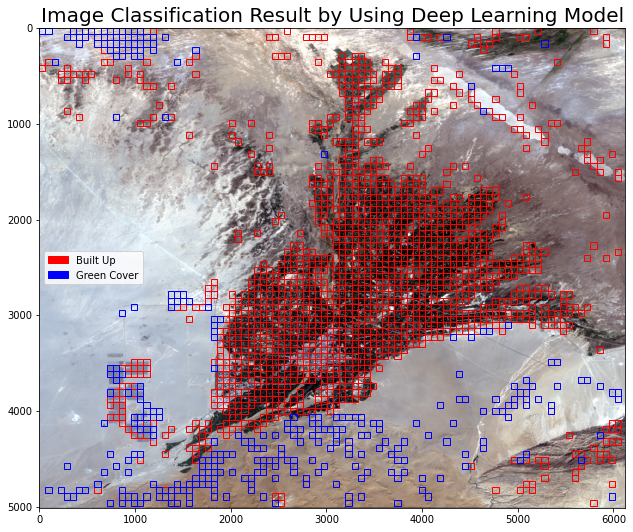

In [51]:
plt.figure(1, figsize = (15, 30))

plt.subplot(3,1,1)
plt.imshow(picture_tensor)

currentAxis = plt.gca()
for i in coord_BuiltUp3:
  currentAxis.add_patch(Rectangle((i[0], i[1]), 64, 64, fill=None, alpha=1, color="red"))

for i in coord_PermVeg3:
  currentAxis.add_patch(Rectangle((i[0], i[1]), 64, 64, fill=None, alpha=1, color="blue"))

red_patch = mpatches.Patch(color='red', label='Built Up')
blue_patch = mpatches.Patch(color='blue', label='Green Cover')

plt.legend(handles=[red_patch, blue_patch])

plt.title("Image Classification Result by Using Deep Learning Model", fontsize=20)
plt.show()


